In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

%matplotlib inline

In [152]:
sns.set_style('darkgrid')
sns.set_context('talk')
sns.set_palette('Set2')

Importing data

In [3]:
# artist -> instagram
artist_insta = pd.read_csv('./output/name_insta_data.txt', header=0,
                        index_col=0)

# instagram -> n_followers

follower_count = pd.read_pickle('./output/follower_count.pkl')

Let's organize the data a little bit. 

In [31]:
data = pd.DataFrame(columns=['Instagram','Followers', 'Artist'])

for i, cell in enumerate(artist_insta.loc[:, "Instagram"]):
    for insta in literal_eval(cell):
        data = data.append(dict(Artist = artist_insta.loc[i,'Name'], 
                                Instagram = insta,
                               Followers = follower_count.loc[insta,0]),
                          ignore_index=True)

In [33]:
data.head()

,Instagram,Followers,Artist
0,heartless_trash252,1210.0,NaN
1,eternaltattoone,1243.0,Aaron Beaudette
2,aaronbeaudette,1513.0,Aaron Beaudette
3,ace_of_art,25543.0,Aaron Rhaburn
4,aaronistattoo,33630.0,Aaron Is


Filter out instagrams which we weren't able to get number of followers
and remove duplicates.

In [206]:
data = data.loc[~data['Followers'].isnull(),:]
data.drop_duplicates(inplace=True)

An import thing to keep in mind is that a lot fo the artists have two or more instagram accounts associated with them. That is because in their villain-arts profile page they list their personal account and also the account of their studio.

Let's look at how many of the instagram accounts are associated with more than one artist. These should not be personal accounts.

In [48]:
data['Instagram'].describe()

count              278
unique             259
top       holistic_ink
freq                 3
Name: Instagram, dtype: object

We see that 259 out of the 278 entries are unique.
Let's look only at instagram by followers. To do so we'll create a new DataFrame
by dropping duplicates.

In [90]:
insta_count = data.drop_duplicates(subset=['Instagram']).loc[:,['Instagram', 'Followers']]
insta_count.set_index('Instagram', inplace=True)

Let's take a first look at the follower distribution

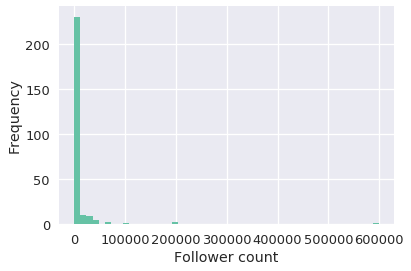

In [195]:
sns.distplot(insta_count,kde=False,
            hist_kws = dict(alpha=1))

plt.xlabel("Follower count")
plt.ylabel("Frequency")
plt.show()

What's the CDF?

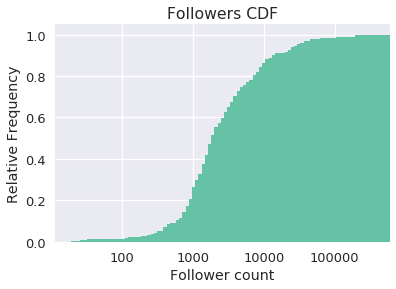

In [197]:
np.log10(insta_count).hist(cumulative=True, bins=100, normed=True)
xticks = np.array([2,3,4,5])

xticklabels = 10**xticks

plt.title("Followers CDF")

plt.xticks(xticks,xticklabels)
plt.xlim(xmax=np.log10(insta_count.values.max()))

plt.xlabel("Follower count")
plt.ylabel("Relative Frequency")

plt.show()

From CDF we can see that more than 80% of the accounts have less than 10k followers
and about 20% less than 1000.

Looks like there are a few outliers. What is the distribution without them?
Let's exclude points two sigmas away from the mean.

In [117]:
insta_out = insta_count > (insta_count.mean() + 2*insta_count.std())

In [118]:
# outliers
insta_count[insta_out.values]

,Followers
Instagram,
cleenrockone,197520.0
blackink.125th,202020.0
inkbykyledunbar,106254.0
ryanhenrytattoo,598989.0


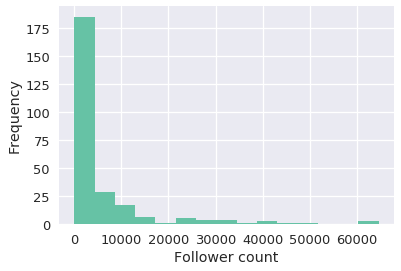

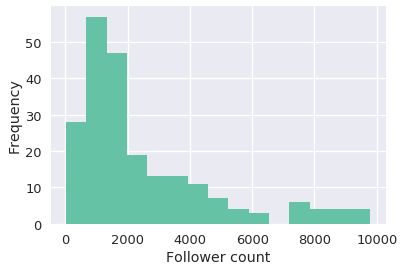

In [196]:
sns.distplot(insta_count[~insta_out.values],
             kde=False, bins = 15,
            hist_kws = dict(alpha=1))

plt.xlabel("Follower count")
plt.ylabel("Frequency")
plt.show()


sns.distplot(insta_count[(insta_count < 1e4).values],
             kde=False, bins = 15,
            hist_kws = dict(alpha=1))

plt.xlabel("Follower count")
plt.ylabel("Frequency")
plt.show()

Top 10 instagram accounts:

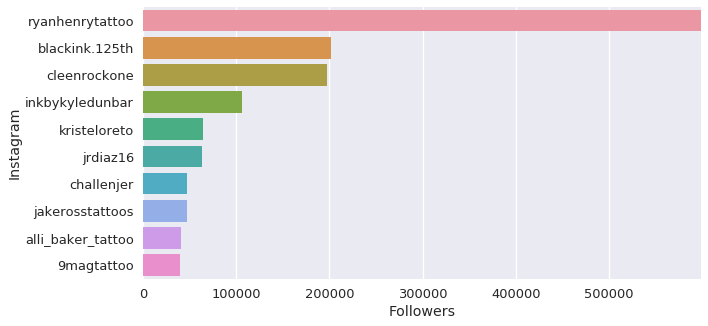

In [292]:
fig, ax = plt.subplots(figsize=(10,5))

top10 = data.sort_values('Followers', ascending=False)[0:10]

sns.barplot(x='Followers', y = 'Instagram', data = top10,
            ci=None, n_boot=0, ax = ax,
              estimator=np.sum)
ax.set_xlim(xmax=top10.Followers.max())

plt.show()

In [291]:
top10.loc[top10['Artist']=='Ryan Henry']

,Instagram,Followers,Artist
239,ryanhenrytattoo,598989.0,Ryan Henry
238,9magtattoo,39536.0,Ryan Henry
